In [21]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
Path.ls = lambda x: list(x.iterdir())

In [3]:
data_path = Path('/project/cq-training-1/project2/data')

In [4]:
data_path.ls()

[PosixPath('/project/cq-training-1/project2/data/unaligned.en'),
 PosixPath('/project/cq-training-1/project2/data/unaligned.fr'),
 PosixPath('/project/cq-training-1/project2/data/train.lang2'),
 PosixPath('/project/cq-training-1/project2/data/train.lang1')]

In [14]:
with open(data_path/'train.lang1') as f:
    eng_data = f.readlines()
    
with open(data_path/'train.lang2') as f:
    fr_data = f.readlines()

In [15]:
len(eng_data),len(fr_data)

(11000, 11000)

In [16]:
# Random print
idx = np.random.choice(len(eng_data),size=5)
for i in idx:
    print(eng_data[i].rstrip())
    print(fr_data[i])

and my father said ok listen
Et mon pere a dit " écoute

i have to warn her
Je dois l' avertir .

i agree with the basic idea of creating a european framework for regulations on the organisation of working time
Je partage l' idée de base de créer un cadre européen pour les réglementations en matière d' organisation du temps de travail .

and no eu leader in his or her right mind could have any interest in that
Et aucun chef de gouvernement sain d’ esprit ne peut trouver un intérêt à une telle issue .

it seems to me to be good news in the fight against terrorism although the resolution of parliament does not say so that the formal extradition procedure for people who have been finally sentenced should be removed
La suppression de la procédure formelle d' extradition pour les personnes qui ont fait l' objet d' une condamnation définitive est à mes yeux une bonne nouvelle pour la lutte contre le terrorisme , même si la résolution du Parlement ne le précise pas .



1) Remove spaces between number or numbers with ',' or '.' in between  
2) Replace numbers with tokens  
3) words begining with caps  
4) words in caps  

In [9]:
for i,(eng,fr) in enumerate(zip(eng_data,fr_data)):
    print(eng.strip())
    print(fr)
    if i == 10:
        break

so too does the idea that accommodating religious differences is dangerous
L’ idée de concilier les différences religieuses semble donc dangereuse .

mr president ladies and gentlemen the financial perspective outlines the scope of the eu ’s activities over coming years as well as providing a framework for such activities and determining how effective they will be
Monsieur le Président , Mesdames et Messieurs , les perspectives financières esquissent la portée des activités de l’ UE pour les années à venir , fournissent un cadre pour ces activités et déterminent leur efficacité .

reserve should turn into thought - provoking policy
La réticence doit laisser place à une politique stimulante .

it is my profound belief that we can only advance through cooperation and negotiation
Je suis intimement convaincu que nous ne pourrons progresser que si nous coopérons et négocions .

the european union has territorial waters greater than its entire territory with 1 200 ports and 90 % of its expo

In [10]:
fr_data[7]

'Prendre note de l’ intention du Parlement de limiter à quatre ans , ...\n'

In [11]:
clean_eng = []
clean_fr = []
for i,(eng,fr) in enumerate(zip(eng_data,fr_data)):
    clean_eng.append(eng.rstrip().split(" "))
    clean_fr.append(fr.rstrip().split(" "))

In [12]:
# eng_data = clean_eng
# fr_data = clean_fr

In [17]:
for i,(eng,fr) in enumerate(zip(eng_data,fr_data)):
    print(eng.rstrip())
    print(fr)
    if i == 10:
        break

so too does the idea that accommodating religious differences is dangerous
L’ idée de concilier les différences religieuses semble donc dangereuse .

mr president ladies and gentlemen the financial perspective outlines the scope of the eu ’s activities over coming years as well as providing a framework for such activities and determining how effective they will be
Monsieur le Président , Mesdames et Messieurs , les perspectives financières esquissent la portée des activités de l’ UE pour les années à venir , fournissent un cadre pour ces activités et déterminent leur efficacité .

reserve should turn into thought - provoking policy
La réticence doit laisser place à une politique stimulante .

it is my profound belief that we can only advance through cooperation and negotiation
Je suis intimement convaincu que nous ne pourrons progresser que si nous coopérons et négocions .

the european union has territorial waters greater than its entire territory with 1 200 ports and 90 % of its expo

In [252]:
eng_count,fr_count = [],[]
for i,(eng,fr) in enumerate(zip(eng_data,fr_data)):
    eng_count.append(len(eng.rstrip().split(" ")))
    fr_count.append(len(fr.rstrip().split(" "))) 

In [253]:
max(eng_count),max(fr_count)

(95, 112)

In [258]:
(np.array(eng_count)>50).sum()

38

In [261]:
(np.array(fr_count)>50).sum()

82

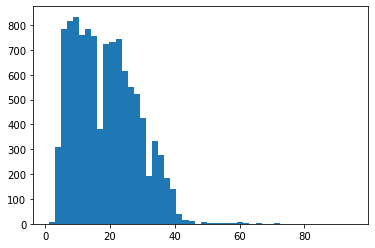

In [255]:
plt.hist(eng_count,bins=50)
plt.show()

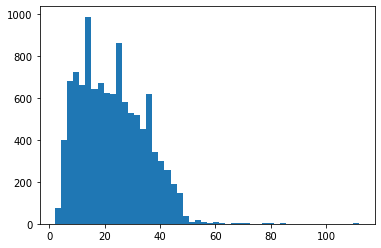

In [256]:
plt.hist(fr_count,bins=50)
plt.show()

In [142]:
spec_tokens = [TK_MAJ,TK_UP]

In [143]:
import collections

In [437]:
class ExtraProcessing():
    
    def __init__(self):
        self.BOS,self.EOS,self.TK_MAJ,self.TK_UP,self.TK_NUM = 'xxstart', 'xxend', 'xxmaj','xxup', 'xxnum'
        
    def regx(self,x):
        # Remove space, comma or point  between numbers
        x = re.sub(r"(\d+)[\s+|,|.](\d+)",r"\1\2",x)
        # enumerate for number tokens
        numerate = lambda m, i=iter(range(10)):f"{self.TK_NUM}_{str(next(i))}"
        # Replace numbers with TK_NUM
        x = re.sub("\d+",numerate,x)
        # Remove some punctuation
        PUNCT = '#&\()*+/<=>@[\\]^_{|}~'
        table = str.maketrans("","",PUNCT)
        x = x.translate(table)
        x = re.sub("\.\.+","",x)
        # Add space between '-' and words
        x = re.sub(r"(-)(\w)",r"\1 \2",x)
        x = re.sub(r"(\w)(-)",r"\1 \2",x)
        # Remove unecessary space
        x = re.sub("\s\s+"," ",x)
        return x
        
    def start_end(self,x):
        x.insert(0,self.BOS)
        x.append(self.EOS)
        return x
        
    def replace_all_caps(self,x):
        "Replace tokens in ALL CAPS in `x` by their lower version and add `TK_UP` before."
        res = []
        for t in x:
            if t.isupper() and len(t) > 1: res.append(self.TK_UP); res.append(t.lower())
            else: res.append(t)
        return res

    def deal_caps(self,x):
        "Replace all Capitalized tokens in `x` by their lower version and add `TK_MAJ` before."
        res = []
        for t in x:
            if t == '': continue
            if t[0].isupper() and len(t) > 1 and (t[1:].islower() or (t[1] == "’" or t[1] == "'" )): 
                res.append(self.TK_MAJ)
            res.append(t.lower())
        return res
    
    def process(self,x):
        x = self.regx(x.strip())
        x = x.split()
        post = [self.deal_caps,self.replace_all_caps,self.start_end]
        for p in post:
            x = p(x)
        return ' '.join(x)

In [438]:
ex = ExtraProcessing()

In [427]:
fr_data[10]

'Règlement appliquant un schéma de préférences tarifaires généralisées ( vote )\n'

In [428]:
ex.process(fr_data[10])

'xxstart xxmaj règlement appliquant un schéma de préférences tarifaires généralisées vote xxend'

In [429]:
ex.process(eng_data[10])

'xxstart regulation applying a scheme of generalised tariff preferences vote xxend'

In [439]:
all_fr = []
for fr_sent in fr_data:
    all_fr.append(ex.process(fr_sent))

"xxstart xxmaj j' estime dès lors qu' il est fondamental de soutenir et de compléter les amendements déposés par la commission des affaires économiques et monétaires , qui fournissent un cadre pertinent pour la proposition de la xxmaj commission . xxend"

In [430]:
for fr_sent in eng_data:
    r = ex.process(fr_sent)

In [387]:
r

'xxstart i agree that we need an ambitious social agenda which will include combating poverty and social exclusion xxend'

In [381]:
ex.process(eng_data[6])

'xxstart but at the moment the priority - let us make this very clear - is what we have on the table the xxnum0 countries and those countries in principle bulgaria and rumania which should enter in xxnum1 xxend'

In [383]:
print(eng_data[6])
print(fr_data[6])

but at the moment the priority - let us make this very clear - is what we have on the table the 2004 countries and those countries in principle bulgaria and rumania which should enter in 2007

Cependant , pour le moment , la priorité -disons - le très nettement- est donnée au sujet actuellement sur la table : les pays candidats à l' adhésion en 2004 et les pays prévus pour 2007 , en principe la Bulgarie et la Roumanie .



'Règlement appliquant un schéma de préférences tarifaires généralisées ( vote )\n'

In [221]:
x = re.sub("\s\s+"," ",fr_data[6])

In [222]:
x

"Cependant , pour le moment , la priorité -disons - le très nettement- est donnée au sujet actuellement sur la table : les pays candidats à l' adhésion en 2004 et les pays prévus pour 2007 , en principe la Bulgarie et la Roumanie .\n"

In [183]:
x = re.sub(r"(-)(\w)",r"\1 \2",fr_data[6])
x

"Cependant , pour le moment , la priorité - disons - le très nettement- est donnée au sujet actuellement sur la table : les pays candidats à l' adhésion en 2004 et les pays prévus pour 2007 , en principe la Bulgarie et la Roumanie .\n"

In [188]:
x = re.sub(r"\s\s+",r"",x)
x

"Cependant , pour le moment , la priorité - disons - le très nettement - est donnée au sujet actuellement sur la table : les pays candidats à l' adhésion en 2004 et les pays prévus pour 2007 , en principe la Bulgarie et la Roumanie .\n"

In [185]:
fr_data[6]

"Cependant , pour le moment , la priorité -disons - le très nettement- est donnée au sujet actuellement sur la table : les pays candidats à l' adhésion en 2004 et les pays prévus pour 2007 , en principe la Bulgarie et la Roumanie .\n"

In [411]:
tt = "I have 1,200 votes compared to 1 100 of your own and 9.5%of his"